In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import warnings
warnings.simplefilter("ignore")

# re regex is sequence  of character that define pattern


In [2]:
data = pd.read_csv(r"C:\Users\Isha Sharma\Downloads\Language Detection.csv.zip")


In [3]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
#Separate independent  and dependent features
X = data["Text"]
y = data["Language"]   

In [6]:
#Label Encoding 
#name of language is categorical variable.for training the model we need numerial form
#so we perform label encoding on output variable
#so we import labelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
#Text Preprocessing
#create a list for append the preprocessed test
#iterating all text
#remove symbols and numbers
#append to data_list
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ',text)
    text = re.sub(r'[[]]', ' ',text)
    text = text.lower()
    data_list.append(text)

In [8]:
#convert text into numerical by create Bags of Words model using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  #used to transform a given text into vector on basis of frequency of each word that occur in entire text
X = cv.fit_transform(data_list).toarray()  
X.shape


#fit_transform() : fit method is calculating the mean and variance
#of each of feature  present in data 

#transform :mean and variance calculated from our training data will help in transform our test data

(10337, 34937)

In [9]:
#Train Test Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
#Model training ad prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() # algo predict the tag of text ad calculates the probability of each tag
# for given sample ad the give the tag with highest probability as output.
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [12]:
#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy is :",ac)


Accuracy is : 0.9738878143133463


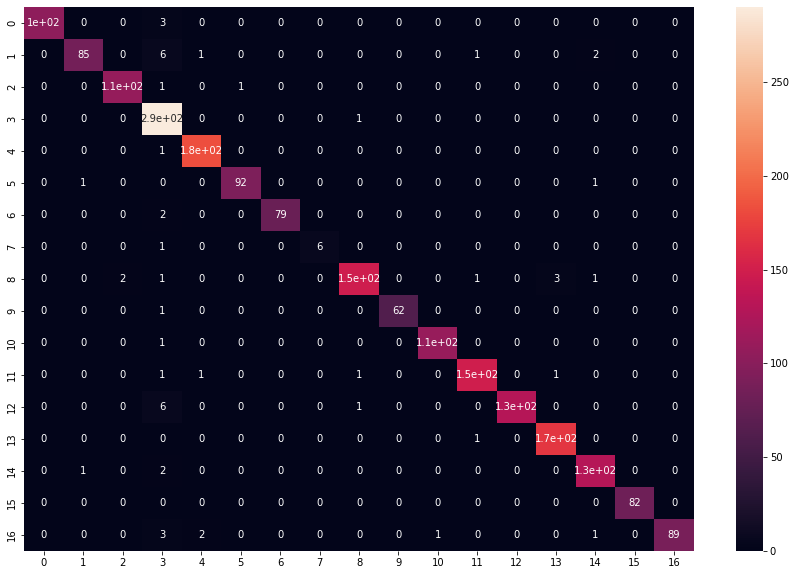

In [13]:
#plot confusion matrix using seaborn heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [24]:
def predict(text):
    x = cv.transform([text]).toarray() #convert text to vector
    lang = model.predict(x) #predict the lang
    lang = le.inverse_transform(lang)# finding the language corresponding the the predicted value
    print("The langauge is in",lang[0])# printing the language
    

In [29]:
predict("helix  provides a community based knowledge ")


The langauge is in English


In [26]:
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")


The langauge is in Malayalam


In [28]:
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")


The langauge is in Arabic
